In [1]:
import h5py
import PIL
import matplotlib.pyplot as plt
import numpy as np

train_path = '/home/zydq/Datasets/LCZ/training.h5'
vali_path = '/home/zydq/Datasets/LCZ/validation.h5'

/home/zydq/environments/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
train_h5 = h5py.File(train_path, 'r')
vali_h5 = h5py.File(vali_path, 'r')
label_names = ['LCZ 1:  Compact high-rise', 'LCZ 2:  Compact mid-rise', 'LCZ 3:  Compact low-rise',
               'LCZ 4:  Open high-rise', 'LCZ 5:  Open mid-rise', 'LCZ 6:  Open low-rise', 
               'LCZ 7:  Lightweight low-rise', 'LCZ 8:  Large low-rise', 'LCZ 9:  Sparsely built',
               'LCZ 10:  Heavy industry', 'LCZ A:  Dense trees', 'LCZ B:  Scattered trees', 
               'LCZ C:  Bush, scrub', 'LCZ D:  Low plants', 'LCZ E:  Bare rock or paved',
               'LCZ F:  Bare soil or sand',  'LCZ G:  Water']

In [278]:
def view_data(source, num):
    VH_ORG = source['sen1'][num,:,:,:2]
    VH_ORG_IN = np.linalg.norm(VH_ORG, axis=-1)[:,:,None] ** 2
    
    VV_ORG = source['sen1'][num,:,:,2:4]
    VV_ORG_IN = np.linalg.norm(VV_ORG, axis=-1)[:,:,None] ** 2
    
    VV_VH_ORG = VH_ORG + np.sqrt(1/2)*VV_ORG
    VV_VH_ORG_IN = np.linalg.norm(VV_VH_ORG, axis=-1)[:,:,None] ** 2
    
    VH_LEE_IN = source['sen1'][num,:,:,4][:,:,None] 
    VV_LEE_IN = source['sen1'][num,:,:,5][:,:,None]
    Rc = source['sen1'][num,:,:,6][:,:,None]
    
    VV_VH_LEE_IN = VH_LEE_IN + VV_LEE_IN / 2 + Rc
    
    
    
    
    RGB = np.concatenate([source['sen2'][num,:,:, [2]], 
                          source['sen2'][num,:,:, [1]], 
                          source['sen2'][num,:,:, [0]]], -1)
    
    CIR = np.concatenate([source['sen2'][num,:,:, [7]], 
                          source['sen2'][num,:,:, [2]], 
                          source['sen2'][num,:,:, [1]]], -1)
    
    IR = np.concatenate([source['sen2'][num,:,:, [9]], 
                          source['sen2'][num,:,:, [8]], 
                          source['sen2'][num,:,:, [2]]], -1)
    
    C652 = np.concatenate([source['sen2'][num,:,:, [8]], 
                          source['sen2'][num,:,:, [7]], 
                          source['sen2'][num,:,:, [1]]], -1)
    
    img = np.concatenate([2*VH_LEE_IN , 
                          VV_LEE_IN , 
                          VV_VH_LEE_IN], -1)
    img = np.concatenate([1-np.exp(-2*VH_LEE_IN), 
                          1-np.exp(-VV_LEE_IN), 
                          1-np.exp(-VV_VH_LEE_IN)], -1)
    
    
#     img[img>1]=1
    print(np.max(img),np.mean(img))
    print(img.shape)
    plt.figure(33,figsize=(40,40))
    p1 = plt.subplot(331)
    p2 = plt.subplot(332)
    p3 = plt.subplot(333)
    p4 = plt.subplot(334)
    p5 = plt.subplot(335)
    p1.imshow(img)

    p2.imshow(RGB)
    p3.imshow(CIR)
    p4.imshow(IR)
    p5.imshow(C652)
#     p1.imshow(1-np.exp(-VV_VH_LEE_IN[:,:,0] ),cmap=plt.cm.gray)

    
    plt.show()
    print(label_names[np.argmax(source['label'][num])])

0.053102778096044356 0.01156884981478006
(32, 32, 3)


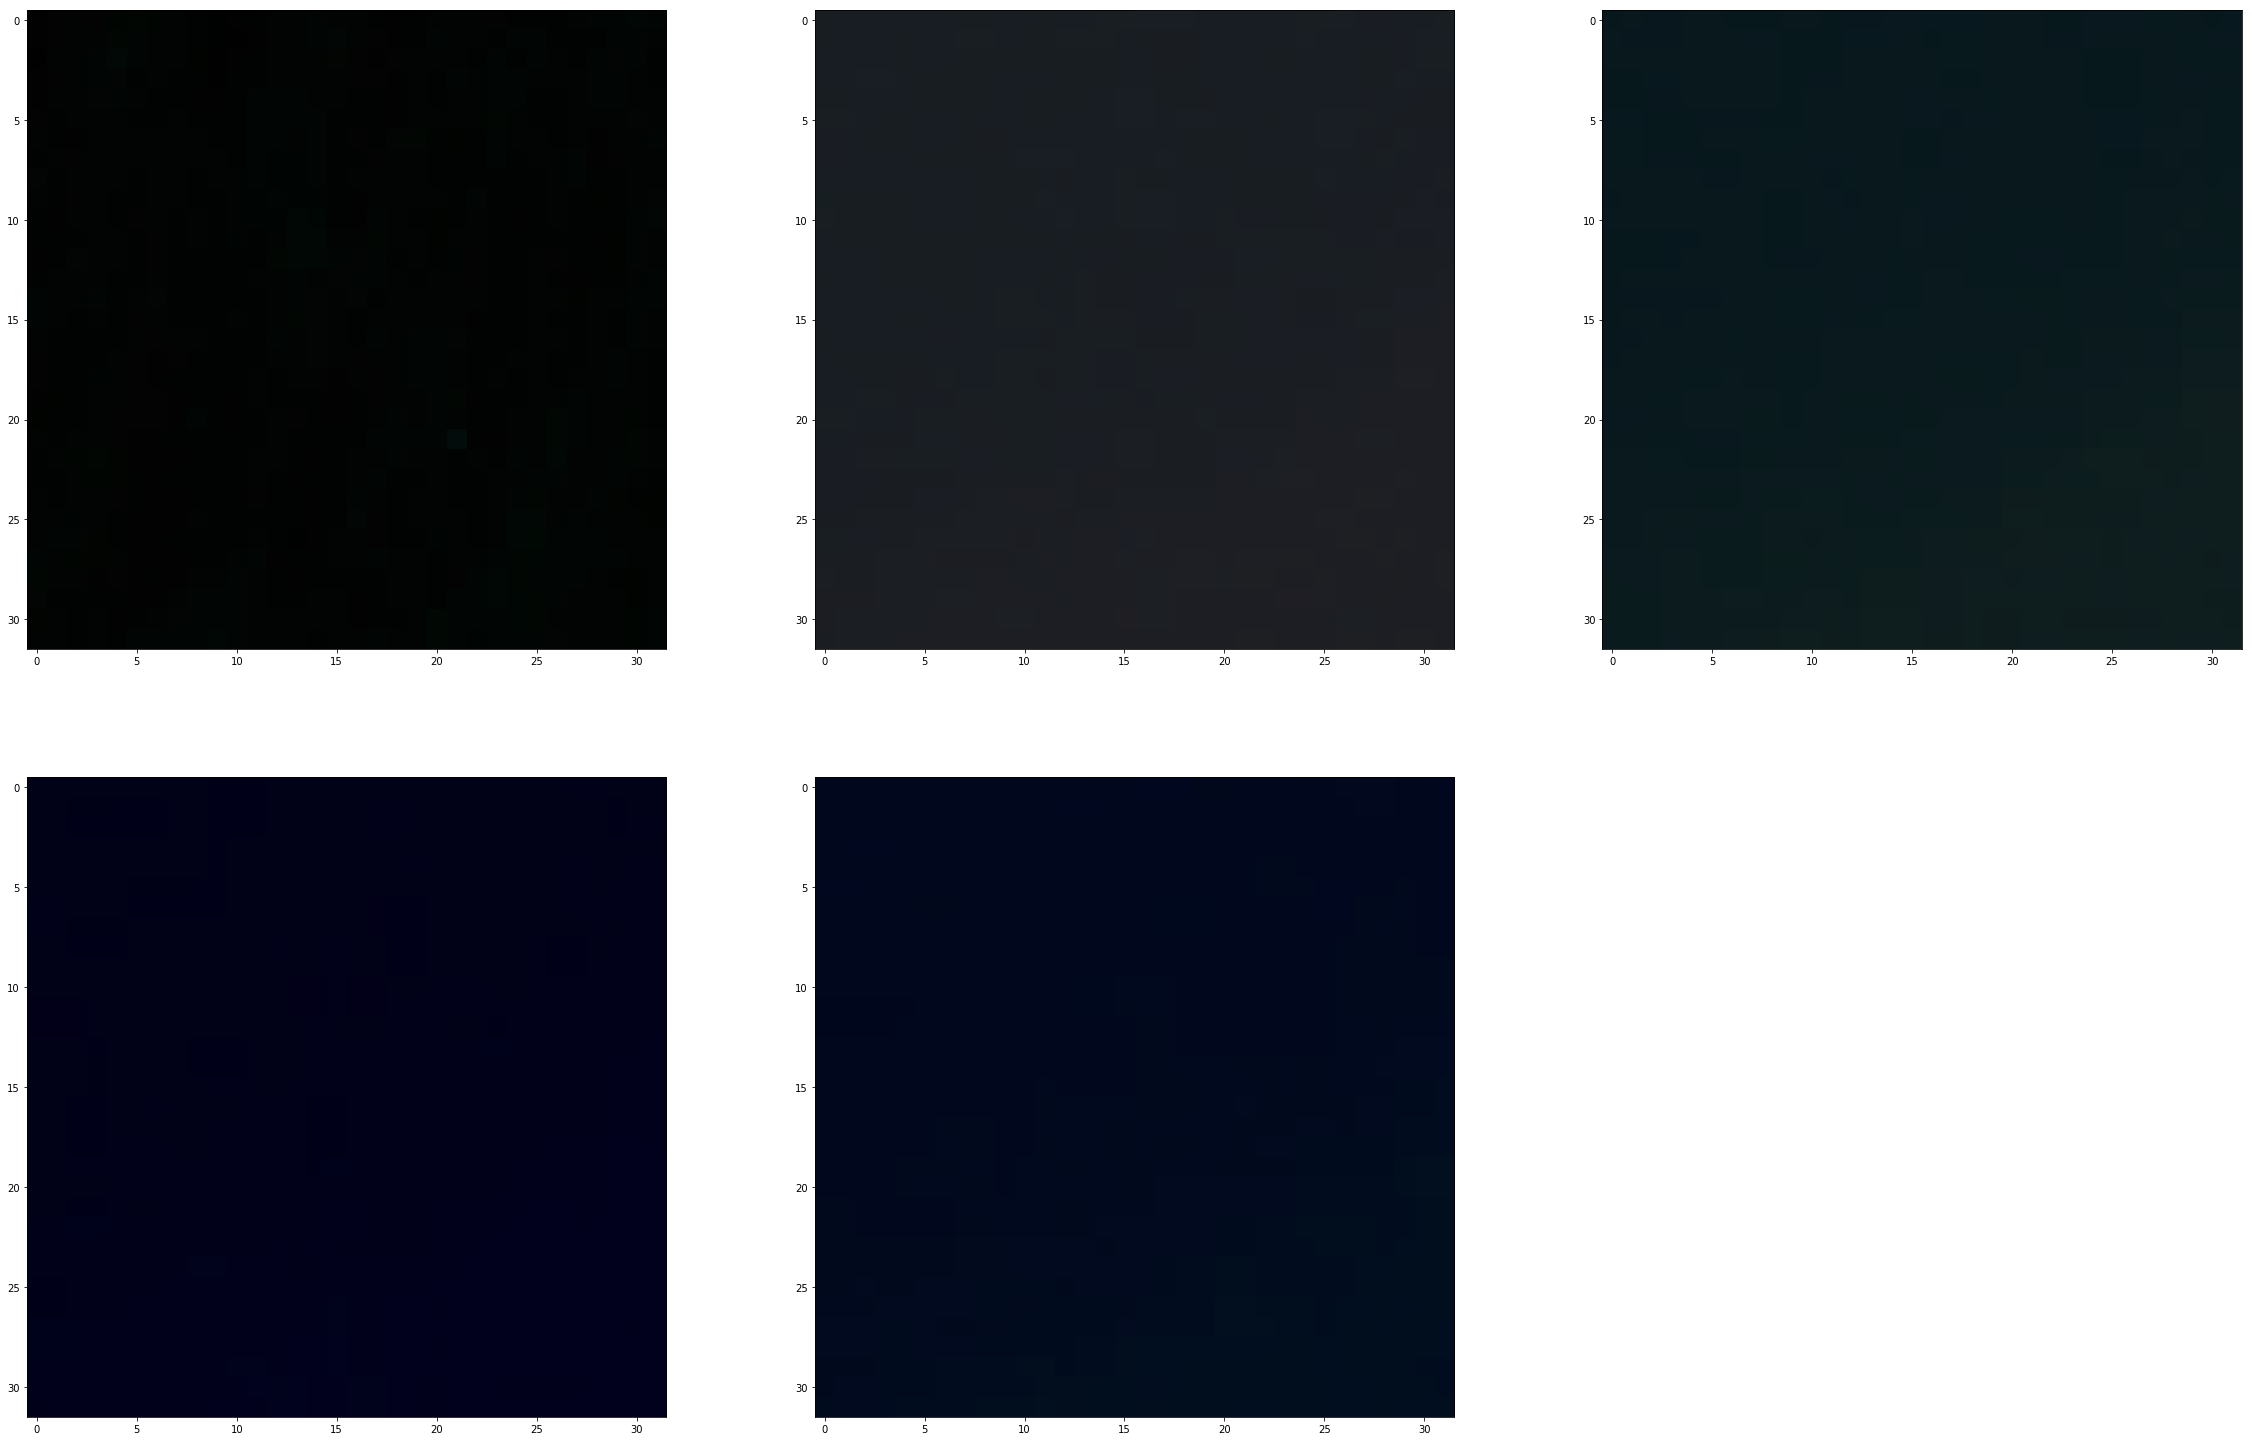

LCZ G:  Water


In [281]:
view_data(train_h5, 900)

In [1117]:
np.ndarray([32,32]).reshape(32,32,1).shape

(32, 32, 1)

In [370]:
train_h5['sen1'][0,0,0,:2] , train_h5['sen1'][0,0,0,4] #/ np.linalg.norm(train_h5['sen1'][0,0,0,:2]) 

(array([-0.01378459, -0.08615369]), 0.013846629299223423)